# Homework 1 - Part A
Use Monte Carlo experiments to show that, for a fixed number of samples $m$, data become effectively “sparser” as the input $n$ dimension grows.

For each $n\in\{1,2,5,10,20,50,100\}$, draw $n$ i.i.d. points $x_{1},\dots,x_{m}\sim\text{Unif}([0,1]^{n})$

Compute the nearest-neighbor (NN) distance for each point and report the mean NN distance as a function of $n$. Plot it as a function of $n$.

---

To start, I will import the `torch` library to make use of PyTorch tensors, as the documentation lists some functionality I will utilize to generate $n$ dimensional vectors whose elements fall in the set $[0,1]$.

In [37]:
import torch
import torch.linalg

# Using numpy later to track minimums
import numpy as np

# For plotting
import matplotlib.pyplot as plt

To compute a mean nearest-neighbor distance for dimensions $n$ given a fixed $m$ I will construct a function that performs the following steps
1. Creates an array of $n$ dimensional vectors within the unit plane, cube, or $n$-dimensional hypercube centered at the origin for $\mathbb{R}^{n}$
2. For each vector, find the minimum of the distances between that vector and other vectors in the array, add this to some aggregator/sum variable
3. Divide by $m$, return that value

**Tensors** in torch are how I will represent a size $m$ array of $n$ dimensional vectors. Based on PyTorch documentation I have found that 2D tensors can be treated as 2D arrays in row-major order, so I will construct an $m \times n$ tensor where each row is a vector whose components are all in the set $[0,1]$.

To both create the tensor and sample from the uniform distribution, I use `torch.rand` as exemplified by the following code:

In [31]:
# Fix M and N, these will be function parameters
M = 10
N = 2

# Create the array of vectors, an M by N tensor
arr = torch.rand(M, N)

# Display row 0, which should be a 2D vector
arr[0]

tensor([0.6378, 0.0314])

With the ability to create tensors and represent arrays of vectors, all I need left is some way to compute distances between vectors.

Torch offers the `vector_norm` function for computing the norm of a vector, so I can take any two rows, subtract them, and compute the norm. 

In [32]:
torch.linalg.vector_norm(arr[0] - arr[1])

tensor(0.6508)

These are about all the basic tools I need from PyTorch to be able to write a function to find the nearest-neighbor distance per vector. To avoid redundant computation I will keep track of the min distance for every vector so that I only have to iterate through subsequent vectors for any one vector.

In [41]:
'''
Given a fixed dimension and sample size, uses Monte-Carlo method to compute
a mean nearest-neighbor distance
n   - The # of dimensions in randomly generated vectors
m   - The # of samples
'''
def mean_nearest_neighbors(n, m):
    # Generate an m by n tensor (m sized array of n dimensional vectors)
    t = torch.rand(m, n)

    # Create an array of minimum distances
    # Since norm cannot be negative, we will use negative values to indicate that a distance
    #   has not been computed.
    nearest_neighbors = np.full((m), -1.0)

    # Iterate to identify nearest neighbor distances
    for curr_idx in range(0, m - 1):
        for comp_idx in range(curr_idx, m):
            # Compute the norm between the two selected vectors
            dist = torch.linalg.vector_norm(t[curr_idx] - t[comp_idx])

            # Fill or replace the value in nearest_neighbors
            if nearest_neighbors[curr_idx] < 0 or dist < nearest_neighbors[curr_idx]:
                nearest_neighbors[curr_idx] = dist

            # Check the other vector too
            if nearest_neighbors[comp_idx] < 0 or dist < nearest_neighbors[comp_idx]:
                nearest_neighbors[comp_idx] = dist
    
    # Compute the mean of nearest_neighbor distances and return
    mean = nearest_neighbors.sum() / m # This should be a scalar at this point
    return mean

Below is a sample function call for $n=50$ and $m=100$

In [34]:
# Sample function call
mean_nearest_neighbors(50, 100)

np.float64(0.022028968334198)

Now we can use this function to create plots for different fixed $m$ and $n\in\{1, 2, 5, 10, 20, 50, 100\}$

In [42]:
# Create a meshgrid of m, n pairs
n = np.array([1, 2, 5, 10, 20, 50, 100])
m = np.array([10, 100, 500])

# Compute
mean_dists = np.zeros((m.shape[0], n.shape[0]))
for i in np.arange(m.shape[0]):
    for j in np.arange(n.shape[0]):
        mean_dists[i][j] = mean_nearest_neighbors(n[j], m[i])

# Display
mean_dists

array([[4.27954197e-03, 9.36747715e-03, 2.82422125e-02, 9.18764949e-02,
        1.65521109e-01, 2.42839026e-01, 3.73783803e-01],
       [7.09354877e-06, 3.23468558e-04, 3.75407934e-03, 6.98090851e-03,
        1.16302943e-02, 2.31894064e-02, 3.54680109e-02],
       [2.15768814e-07, 2.22365540e-05, 4.00917500e-04, 7.49446332e-04,
        2.16424870e-03, 3.99310112e-03, 7.07834768e-03]])

Now we plot

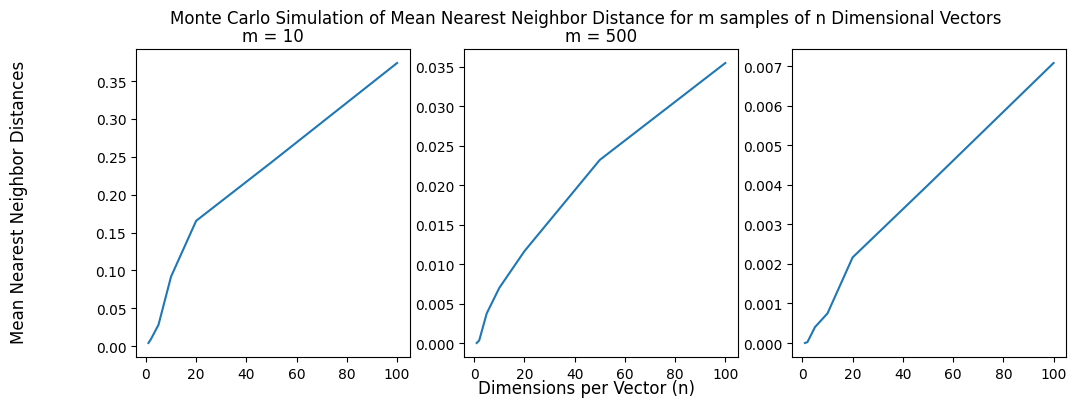

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(n, mean_dists[0])
axes[1].plot(n, mean_dists[1])
axes[2].plot(n, mean_dists[2])

axes[0].set_title("m = 10")
axes[1].set_title("m = 100")
axes[2].set_title("m = 500")

fig.supxlabel("Dimensions per Vector (n)")
fig.supylabel("Mean Nearest Neighbor Distances")
fig.suptitle("Monte Carlo Simulation of Mean Nearest Neighbor Distance for m samples of n Dimensional Vectors")

plt.show()